C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

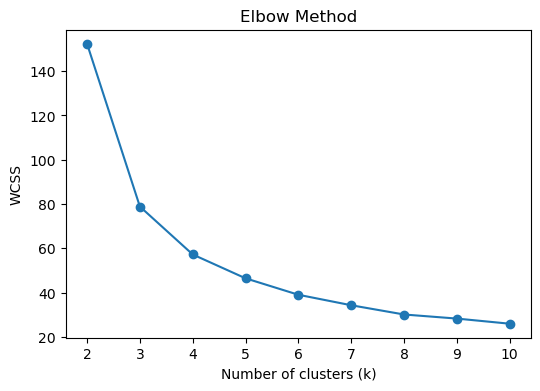

C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

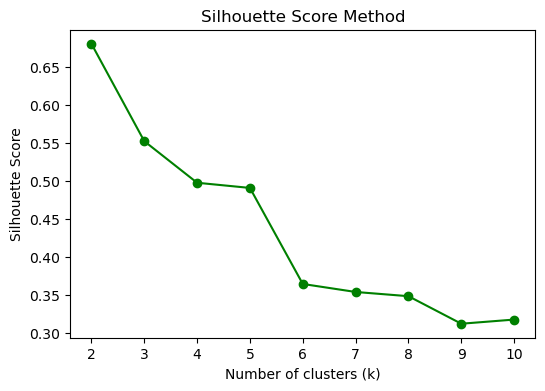

Best K by Silhouette Score: 2


In [3]:
# Step 1: Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Load dataset
iris = load_iris()
X = iris.data  # using features only

# Step 3: Elbow Method (WCSS)
wcss = []
for k in range(2, 11):  # start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Step 4: Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Step 5: Show best K
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Best K by Silhouette Score:", best_k)


In [4]:
wcss

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.461172672672674,
 39.03998724608725,
 34.3058152958153,
 30.132440554614476,
 28.290635241951033,
 25.970929851803426]

In [5]:
labels 

array([2, 8, 8, 8, 2, 7, 8, 2, 8, 8, 7, 2, 8, 8, 7, 7, 7, 2, 7, 2, 2, 2,
       8, 2, 2, 8, 2, 2, 2, 8, 8, 2, 7, 7, 8, 8, 2, 2, 8, 2, 2, 8, 8, 2,
       2, 8, 2, 8, 2, 2, 3, 3, 3, 6, 3, 6, 3, 0, 3, 6, 0, 6, 6, 3, 6, 3,
       6, 6, 3, 6, 1, 6, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 6, 1, 6, 3, 3, 3,
       6, 6, 6, 3, 6, 0, 6, 6, 6, 3, 0, 6, 4, 1, 9, 4, 4, 5, 6, 9, 9, 5,
       4, 1, 4, 1, 1, 4, 4, 5, 5, 1, 4, 1, 5, 1, 4, 9, 1, 1, 4, 9, 9, 5,
       4, 1, 1, 5, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])

In [6]:
score 

0.31796622568242083

C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


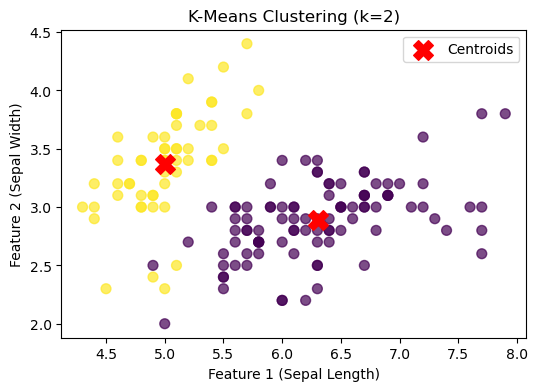

In [7]:
# Step 6: Fit KMeans with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 7: Plot the clusters (use first 2 features for 2D visualization)
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend()
plt.show()
